In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [289]:
application_df = pd.read_csv("application_data.csv")
prev_app_df = pd.read_csv("previous_application.csv")

In [290]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
prev_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [293]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [294]:
prev_app_df.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [295]:
prev_app_df.WEEKDAY_APPR_PROCESS_START.describe()

count     1670214
unique          7
top       TUESDAY
freq       255118
Name: WEEKDAY_APPR_PROCESS_START, dtype: object

In [296]:
print(application_df.shape)
print(prev_app_df.shape)

(307511, 122)
(1670214, 37)


In [297]:
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [298]:
def missingdata_percentage(df):
    missing = pd.DataFrame(columns = ['category', 'percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [299]:
missdata_prev = missingdata_percentage(application_df)

In [300]:
missdata_prev.sort_values('percentage', ascending=False)

,category,percentage
41,COMMONAREA_MEDI,69.872297
13,COMMONAREA_AVG,69.872297
27,COMMONAREA_MODE,69.872297
49,NONLIVINGAPARTMENTS_MEDI,69.432963
35,NONLIVINGAPARTMENTS_MODE,69.432963
...,...,...
7,EXT_SOURCE_2,0.214626
1,AMT_GOODS_PRICE,0.090403
0,AMT_ANNUITY,0.003902
5,CNT_FAM_MEMBERS,0.000650


In [301]:
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [302]:
application_df.drop(["NAME_TYPE_SUITE", "OWN_CAR_AGE", "OCCUPATION_TYPE", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "TOTALAREA_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI"],  axis=1, inplace=True) 

In [303]:
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 72, dtype: int64

In [304]:
application_df.drop(["LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "BASEMENTAREA_MODE"],  axis=1, inplace=True) 

In [305]:
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 69, dtype: int64

In [306]:
application_df.shape

(307511, 69)

In [307]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
prev_app_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [309]:
prev_app_df.drop(["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"],  axis=1, inplace=True)

In [310]:
prev_app_df.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               895844
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              895844
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT 

In [311]:
prev_app_df.shape

(1670214, 35)

In [312]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [313]:
numeric_figures = []
for col in prev_app_df.columns:
    if prev_app_df[col].dtype == float or prev_app_df[col].dtype == int:
        numeric_figures.append(col)

print(numeric_figures)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [314]:
prev_app_df.drop(["SK_ID_PREV"],  axis=1, inplace=True)

In [315]:
prev_app_df.shape

(1670214, 34)

In [316]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE           1670214 non-null  object 
 2   AMT_ANNUITY                  1297979 non-null  float64
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1670214 non-n

In [317]:
print(prev_app_df['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


In [318]:
print(prev_app_df['AMT_GOODS_PRICE'].value_counts())

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64


In [319]:
print(prev_app_df['DAYS_LAST_DUE_1ST_VERSION'].value_counts())

365243.0    93864
9.0           720
8.0           706
0.0           705
5.0           702
            ...  
1774.0          1
1746.0          1
1798.0          1
1790.0          1
1760.0          1
Name: DAYS_LAST_DUE_1ST_VERSION, Length: 4605, dtype: int64


In [320]:
prev_app_df['NAME_TYPE_SUITE'].fillna(prev_app_df.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [321]:
prev_app_df.describe()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [322]:
prev_app_df.isnull().sum()/len(prev_app_df)*100

SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                 0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

In [323]:
values=prev_app_df['AMT_ANNUITY'].median()
prev_app_df.loc[prev_app_df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [324]:
prev_app_df.isnull().sum()/len(prev_app_df)*100

SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                 0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

In [325]:
values=prev_app_df['AMT_DOWN_PAYMENT'].median()
prev_app_df.loc[prev_app_df['AMT_DOWN_PAYMENT'].isnull(),'AMT_DOWN_PAYMENT']=values

In [326]:
values=prev_app_df['AMT_GOODS_PRICE'].median()
prev_app_df.loc[prev_app_df['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values

In [327]:
values=prev_app_df['RATE_DOWN_PAYMENT'].median()
prev_app_df.loc[prev_app_df['RATE_DOWN_PAYMENT'].isnull(),'RATE_DOWN_PAYMENT']=values

In [328]:
values=prev_app_df['CNT_PAYMENT'].median()
prev_app_df.loc[prev_app_df['CNT_PAYMENT'].isnull(),'CNT_PAYMENT']=values

In [329]:
values=prev_app_df['DAYS_FIRST_DRAWING'].median()
prev_app_df.loc[prev_app_df['DAYS_FIRST_DRAWING'].isnull(),'DAYS_FIRST_DRAWING']=values

In [330]:
values=prev_app_df['DAYS_FIRST_DUE'].median()
prev_app_df.loc[prev_app_df['DAYS_FIRST_DUE'].isnull(),'DAYS_FIRST_DUE']=values

In [331]:
values=prev_app_df['DAYS_LAST_DUE_1ST_VERSION'].median()
prev_app_df.loc[prev_app_df['DAYS_LAST_DUE_1ST_VERSION'].isnull(),'DAYS_LAST_DUE_1ST_VERSION']=values

In [332]:
values=prev_app_df['DAYS_LAST_DUE'].median()
prev_app_df.loc[prev_app_df['DAYS_LAST_DUE'].isnull(),'DAYS_LAST_DUE']=values

In [333]:
values=prev_app_df['DAYS_TERMINATION'].median()
prev_app_df.loc[prev_app_df['DAYS_TERMINATION'].isnull(),'DAYS_TERMINATION']=values

In [334]:
values=prev_app_df['NFLAG_INSURED_ON_APPROVAL'].median()
prev_app_df.loc[prev_app_df['NFLAG_INSURED_ON_APPROVAL'].isnull(),'NFLAG_INSURED_ON_APPROVAL']=values

In [335]:
prev_app_df.isnull().sum()/len(prev_app_df)*100

SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_DOWN_PAYMENT               0.000000
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
RATE_DOWN_PAYMENT              0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_TYPE_SUITE                0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000


In [336]:
application_df.isnull().sum()/len(prev_app_df)*100

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     2.485849
AMT_REQ_CREDIT_BUREAU_WEEK    2.485849
AMT_REQ_CREDIT_BUREAU_MON     2.485849
AMT_REQ_CREDIT_BUREAU_QRT     2.485849
AMT_REQ_CREDIT_BUREAU_YEAR    2.485849
Length: 69, dtype: float64

In [337]:
application_df.shape

(307511, 69)

In [338]:
application_df.CODE_GENDER.shape

(307511,)

In [339]:
application_df.CODE_GENDER.describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

In [340]:
application_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [341]:
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_df[numeric_columns]=application_df[numeric_columns].apply(pd.to_numeric)
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
numeric_figures = []
for col in prev_app_df.columns:
    if prev_app_df[col].dtype == float or prev_app_df[col].dtype == int:
        numeric_figures.append(col)

print(numeric_figures)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [343]:
prev_fig_df = pd.DataFrame()

for col in numeric_figures:
    prev_fig_df[col] = prev_app_df[col]
    
prev_fig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1670214 non-null  float64
 1   AMT_APPLICATION            1670214 non-null  float64
 2   AMT_CREDIT                 1670213 non-null  float64
 3   AMT_DOWN_PAYMENT           1670214 non-null  float64
 4   AMT_GOODS_PRICE            1670214 non-null  float64
 5   RATE_DOWN_PAYMENT          1670214 non-null  float64
 6   CNT_PAYMENT                1670214 non-null  float64
 7   DAYS_FIRST_DRAWING         1670214 non-null  float64
 8   DAYS_FIRST_DUE             1670214 non-null  float64
 9   DAYS_LAST_DUE_1ST_VERSION  1670214 non-null  float64
 10  DAYS_LAST_DUE              1670214 non-null  float64
 11  DAYS_TERMINATION           1670214 non-null  float64
 12  NFLAG_INSURED_ON_APPROVAL  1670214 non-null  float64
dtypes: float64(1

In [344]:
commoncol = application_df.columns.intersection(prev_app_df.columns)
print(commoncol)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')


In [345]:
NewDataMerge = pd.merge(application_df[['SK_ID_CURR', 'TARGET']], prev_app_df, how='left', on= ['SK_ID_CURR'])
NewDataMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1430155 non-null  int64  
 1   TARGET                       1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   AMT_ANNUITY                  1413701 non-null  float64
 4   AMT_APPLICATION              1413701 non-null  float64
 5   AMT_CREDIT                   1413700 non-null  float64
 6   AMT_DOWN_PAYMENT             1413701 non-null  float64
 7   AMT_GOODS_PRICE              1413701 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413701 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  float64
 12  RATE_DOWN_PAYMENT            1413701 non-n

In [346]:
NewDataMerge.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430155e+06,1.430155e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784702e+05,8.624240e-02,1.484032e+04,1.752436e+05,1.963541e+05,3.995151e+03,2.006552e+05,1.247893e+01,9.964321e-01,6.502725e-02,-8.803670e+02,3.149878e+02,1.517141e+01,3.513807e+05,7.805154e+03,1.992458e+04,4.602347e+04,4.946867e+04,1.993661e-01
std,1.028021e+05,2.807218e-01,1.316370e+04,2.936222e+05,3.194813e+05,1.435371e+04,2.820189e+05,3.331474e+00,5.962560e-02,7.524069e-02,7.835402e+02,7.695082e+03,1.299505e+01,6.989696e+04,5.608221e+04,8.407070e+04,1.222414e+05,1.259376e+05,3.995239e-01
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-1.497876e-05,-2.922000e+03,-1.000000e+00,0.000000e+00,-2.922000e+03,-2.892000e+03,-2.801000e+03,-2.889000e+03,-2.874000e+03,0.000000e+00
25%,1.893610e+05,0.000000e+00,7.406055e+03,1.975050e+04,2.488050e+04,1.638000e+03,6.637500e+04,1.000000e+01,1.000000e+00,5.160508e-02,-1.313000e+03,-1.000000e+00,1.000000e+01,3.652430e+05,-1.032000e+03,-5.950000e+02,-7.450000e+02,-7.040000e+02,0.000000e+00
50%,2.789560e+05,0.000000e+00,1.125000e+04,7.087050e+04,8.059500e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,5.160508e-02,-5.820000e+02,4.000000e+00,1.200000e+01,3.652430e+05,-8.310000e+02,-3.610000e+02,-5.370000e+02,-4.990000e+02,0.000000e+00
75%,3.675090e+05,0.000000e+00,1.674797e+04,1.800000e+05,2.156400e+05,1.638000e+03,1.800000e+05,1.500000e+01,1.000000e+00,5.160508e-02,-2.710000e+02,8.500000e+01,1.800000e+01,3.652430e+05,-6.710000e+02,-1.740000e+02,-3.590000e+02,-3.220000e+02,0.000000e+00
max,4.562550e+05,1.000000e+00,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,3.652430e+05,3.652430e+05,3.652430e+05,3.652430e+05,3.652430e+05,1.000000e+00


In [347]:
NewDataMerge.shape

(1430155, 35)

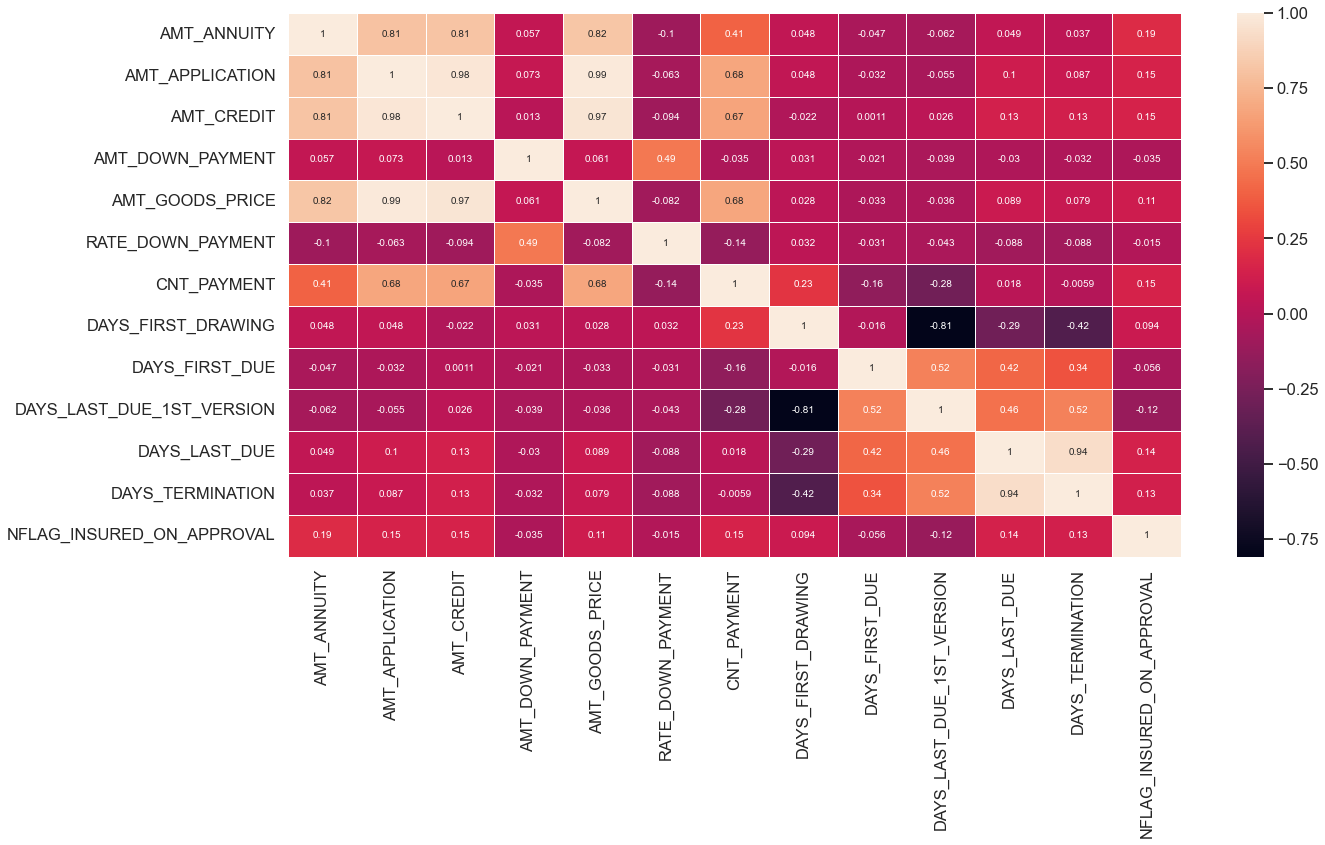

In [348]:
plt.figure(figsize=(20,10))
sns.heatmap(prev_fig_df.corr(), annot=True, linewidths=.5, )
plt.show()

### What we can infer from this heatmap is that
## 1. High Correlation between
a) AMT_ANNUITY,AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE
b) DAYS_LAST_DUE, DAYS_TERMINATION
c) AMT_GOODS_PRICE, AMT_CREDIT
## 2. High Negative Correlation between
a) DAYS_FIRST_DRAWING, DAYS_LAST_DUE_1ST_VERSION
## 3. Somewhat Correlated
a) CNT_PAYMENT, AMT_GOODS_PRICE, AMT_CREDIT, AMT_APPLICATION

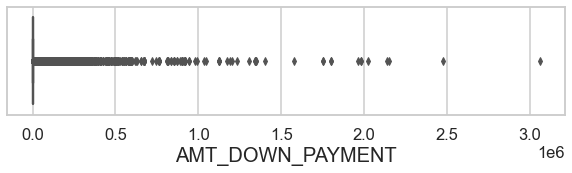

In [349]:
plt.figure(figsize=(10,2))
sns.boxplot(NewDataMerge['AMT_DOWN_PAYMENT'])
plt.show()

In [350]:
NewDataMerge = NewDataMerge[NewDataMerge['AMT_DOWN_PAYMENT'] < np.nanpercentile(NewDataMerge['AMT_DOWN_PAYMENT'], 99)]

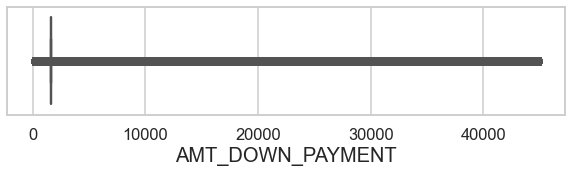

In [351]:
plt.figure(figsize=(10,2))
sns.boxplot(NewDataMerge['AMT_DOWN_PAYMENT'])
plt.show()

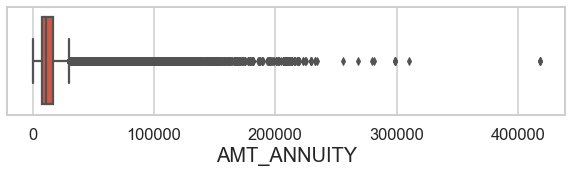

In [352]:
plt.figure(figsize=(10,2))
sns.boxplot(NewDataMerge['AMT_ANNUITY'])
plt.show()

In [353]:
NewDataMerge = NewDataMerge[NewDataMerge['AMT_ANNUITY'] < np.nanpercentile(NewDataMerge['AMT_ANNUITY'], 99)]

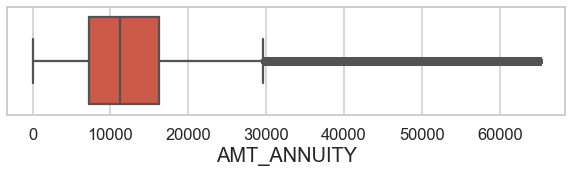

In [354]:
plt.figure(figsize=(10,2))
sns.boxplot(NewDataMerge['AMT_ANNUITY'])
plt.show()

In [355]:
tar0_df = NewDataMerge.loc[NewDataMerge["TARGET"]==0]
tar1_df = NewDataMerge.loc[NewDataMerge["TARGET"]==1]

round(len(tar0_df)/len(tar1_df),2)

10.46

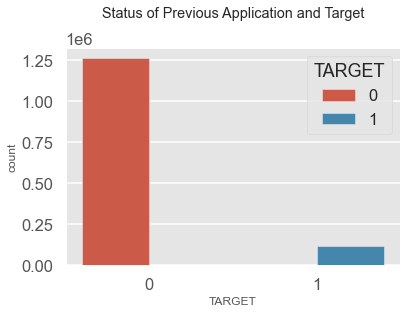

In [356]:
plt.style.use("ggplot")
plt.title("Status of Previous Application and Target")
sns.countplot(NewDataMerge['TARGET'], hue=NewDataMerge['TARGET'])
plt.show()

In [357]:
Total_approved = NewDataMerge[NewDataMerge['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
Total_default = NewDataMerge[(NewDataMerge['TARGET']==1)&(NewDataMerge['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]
print("% of applicants approved previously that defaulted in current loan ;", (Total_default*100/Total_approved))

% of applicants approved previously that defaulted in current loan ; 7.665149896341809


In [358]:
Prev_refused = NewDataMerge[NewDataMerge['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
Paid_current = NewDataMerge[(NewDataMerge['TARGET']==0)&(NewDataMerge['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]
print("% of applicants refused previously but paid current loan ;", (Paid_current*100/Prev_refused))

% of applicants refused previously but paid current loan ; 87.88653859839336


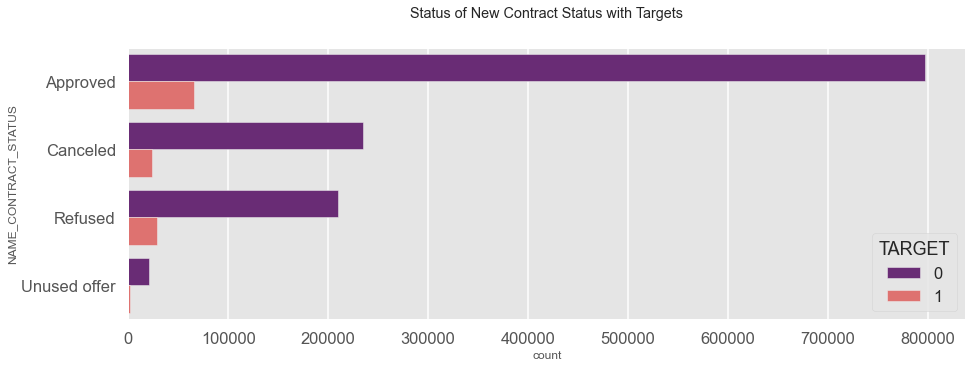

In [359]:
plt.figure(figsize=(15, 5))
plt.title('Status of New Contract Status with Targets')
cs = sns.countplot(data = NewDataMerge, y = 'NAME_CONTRACT_STATUS', 
                   order=NewDataMerge['NAME_CONTRACT_STATUS'].value_counts().index, hue = 'TARGET', palette='magma')

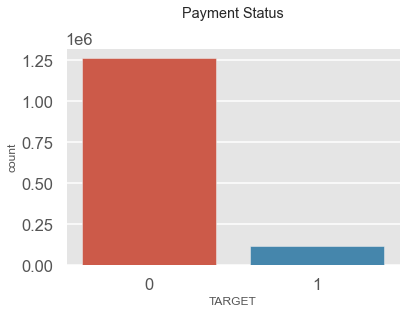

In [360]:
plt.title("Payment Status")
sns.countplot(NewDataMerge['TARGET'])
plt.show()
## This data is highly imbalanced given that in total population the number of defaulters are very less

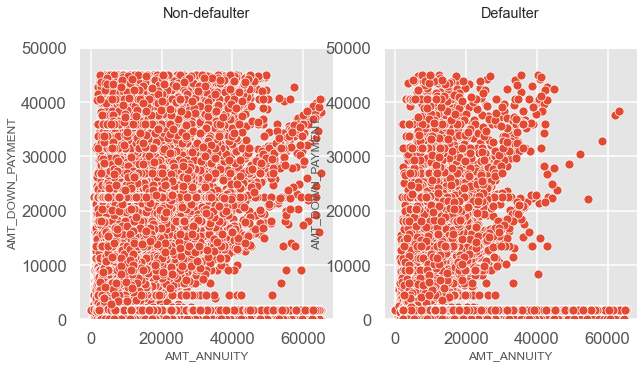

In [361]:
## Numeric features of previous app data

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,50000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,50000), title="Defaulter")

sns.scatterplot(NewDataMerge[NewDataMerge["TARGET"] == 0]['AMT_ANNUITY'], NewDataMerge[NewDataMerge["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1)
sns.scatterplot(NewDataMerge[NewDataMerge["TARGET"] == 1]['AMT_ANNUITY'], NewDataMerge[NewDataMerge["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2)

plt.show()

In [362]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,30))
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.titlesize'] = 10
    plt.rcParams['axes.titlepad'] = 10
       
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    plt.xticks(rotation=45, fontsize=7)
    plt.xticks(fontsize='7')
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

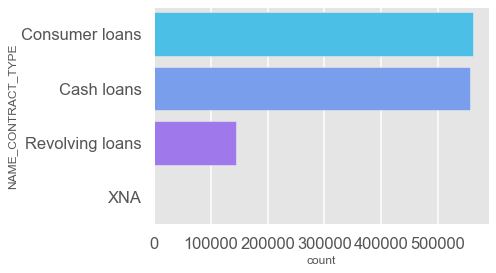

In [363]:
sns.countplot(data=tar0_df,y='NAME_CONTRACT_TYPE',order=tar0_df['NAME_CONTRACT_TYPE'].value_counts().index,palette='cool')

plt.show()


In [364]:
tar0_df_corr=tar0_df.iloc[0:,2:]
tar1_df_corr=tar1_df.iloc[0:,2:]

target0=tar0_df_corr.corr(method='spearman')
target1=tar1_df_corr.corr(method='spearman')

In [365]:
target0

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
AMT_ANNUITY,1.000000,0.567072,0.598938,-0.093481,0.831269,-0.048885,0.024433,-0.146624,0.235666,-0.381003,0.380183,0.074686,0.214868,0.238511,0.237199,0.214422,0.168217
AMT_APPLICATION,0.567072,1.000000,0.910245,-0.073374,0.655632,0.009841,0.019557,-0.112571,-0.117622,0.048616,0.435900,0.106775,0.173178,0.175214,0.191568,0.151621,0.287187
AMT_CREDIT,0.598938,0.910245,1.000000,-0.115803,0.678649,-0.000415,-0.055278,-0.156333,-0.152530,-0.009994,0.349862,-0.113135,0.190585,0.298628,0.253686,0.256004,0.269334
AMT_DOWN_PAYMENT,-0.093481,-0.073374,-0.115803,1.000000,-0.107342,0.014679,0.000672,0.974210,-0.177345,0.024225,-0.180632,-0.001632,-0.233398,-0.240424,-0.257800,-0.253214,0.004649
AMT_GOODS_PRICE,0.831269,0.655632,0.678649,-0.107342,1.000000,-0.058051,-0.024546,-0.161022,0.282347,-0.425634,0.552693,-0.017182,0.239357,0.370219,0.316867,0.315088,0.129379
HOUR_APPR_PROCESS_START,-0.048885,0.009841,-0.000415,0.014679,-0.058051,1.000000,0.005088,0.013242,-0.042411,0.138758,-0.047814,0.002382,-0.000986,-0.020482,-0.008689,-0.009940,-0.067131
NFLAG_LAST_APPL_IN_DAY,0.024433,0.019557,-0.055278,0.000672,-0.024546,0.005088,1.000000,0.000829,0.013969,0.005708,0.083942,-0.009506,-0.007983,-0.006906,-0.007262,-0.006605,0.021858
RATE_DOWN_PAYMENT,-0.146624,-0.112571,-0.156333,0.974210,-0.161022,0.013242,0.000829,1.000000,-0.190873,0.012085,-0.205842,-0.001491,-0.248807,-0.256225,-0.275466,-0.270257,0.009700
DAYS_DECISION,0.235666,-0.117622,-0.152530,-0.177345,0.282347,-0.042411,0.013969,-0.190873,1.000000,-0.410164,0.185725,0.056146,0.636934,0.540265,0.593623,0.563472,-0.174414
SELLERPLACE_AREA,-0.381003,0.048616,-0.009994,0.024225,-0.425634,0.138758,0.005708,0.012085,-0.410164,1.000000,-0.274610,0.059493,-0.144591,-0.244504,-0.184558,-0.187345,-0.120505


In [366]:
target1

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
AMT_ANNUITY,1.000000,0.527881,0.563976,-0.058641,0.834398,-0.051505,0.020697,-0.098168,0.200869,-0.408328,0.453595,0.100753,0.152517,0.203231,0.174346,0.158747,0.153217
AMT_APPLICATION,0.527881,1.000000,0.919512,-0.069021,0.631887,0.011524,0.019002,-0.097087,-0.160812,0.059238,0.460563,0.065449,0.166974,0.187807,0.175066,0.143569,0.274732
AMT_CREDIT,0.563976,0.919512,1.000000,-0.096005,0.652045,0.001477,-0.060288,-0.125056,-0.198804,0.007592,0.385106,-0.111460,0.177446,0.290323,0.229634,0.230259,0.259137
AMT_DOWN_PAYMENT,-0.058641,-0.069021,-0.096005,1.000000,-0.062927,0.003466,-0.003944,0.973803,-0.140319,-0.049422,-0.130230,-0.011821,-0.220256,-0.214974,-0.236636,-0.230687,0.016612
AMT_GOODS_PRICE,0.834398,0.631887,0.652045,-0.062927,1.000000,-0.061687,-0.024083,-0.102300,0.252773,-0.450776,0.571715,-0.001378,0.184729,0.327701,0.254667,0.254207,0.112944
HOUR_APPR_PROCESS_START,-0.051505,0.011524,0.001477,0.003466,-0.061687,1.000000,0.012160,0.001817,-0.045112,0.122044,-0.041527,0.005752,-0.000554,-0.020278,-0.007400,-0.008685,-0.047387
NFLAG_LAST_APPL_IN_DAY,0.020697,0.019002,-0.060288,-0.003944,-0.024083,0.012160,1.000000,-0.003433,0.020042,0.008315,0.087916,-0.012072,-0.003138,-0.001455,-0.002988,-0.002488,0.020024
RATE_DOWN_PAYMENT,-0.098168,-0.097087,-0.125056,0.973803,-0.102300,0.001817,-0.003433,1.000000,-0.152582,-0.057292,-0.151209,-0.011474,-0.235019,-0.230406,-0.253463,-0.247136,0.021451
DAYS_DECISION,0.200869,-0.160812,-0.198804,-0.140319,0.252773,-0.045112,0.020042,-0.152582,1.000000,-0.410430,0.148171,0.019569,0.537178,0.444672,0.496632,0.477994,-0.187088
SELLERPLACE_AREA,-0.408328,0.059238,0.007592,-0.049422,-0.450776,0.122044,0.008315,-0.057292,-0.410430,1.000000,-0.256165,0.060419,-0.100468,-0.205121,-0.136397,-0.140548,-0.070128


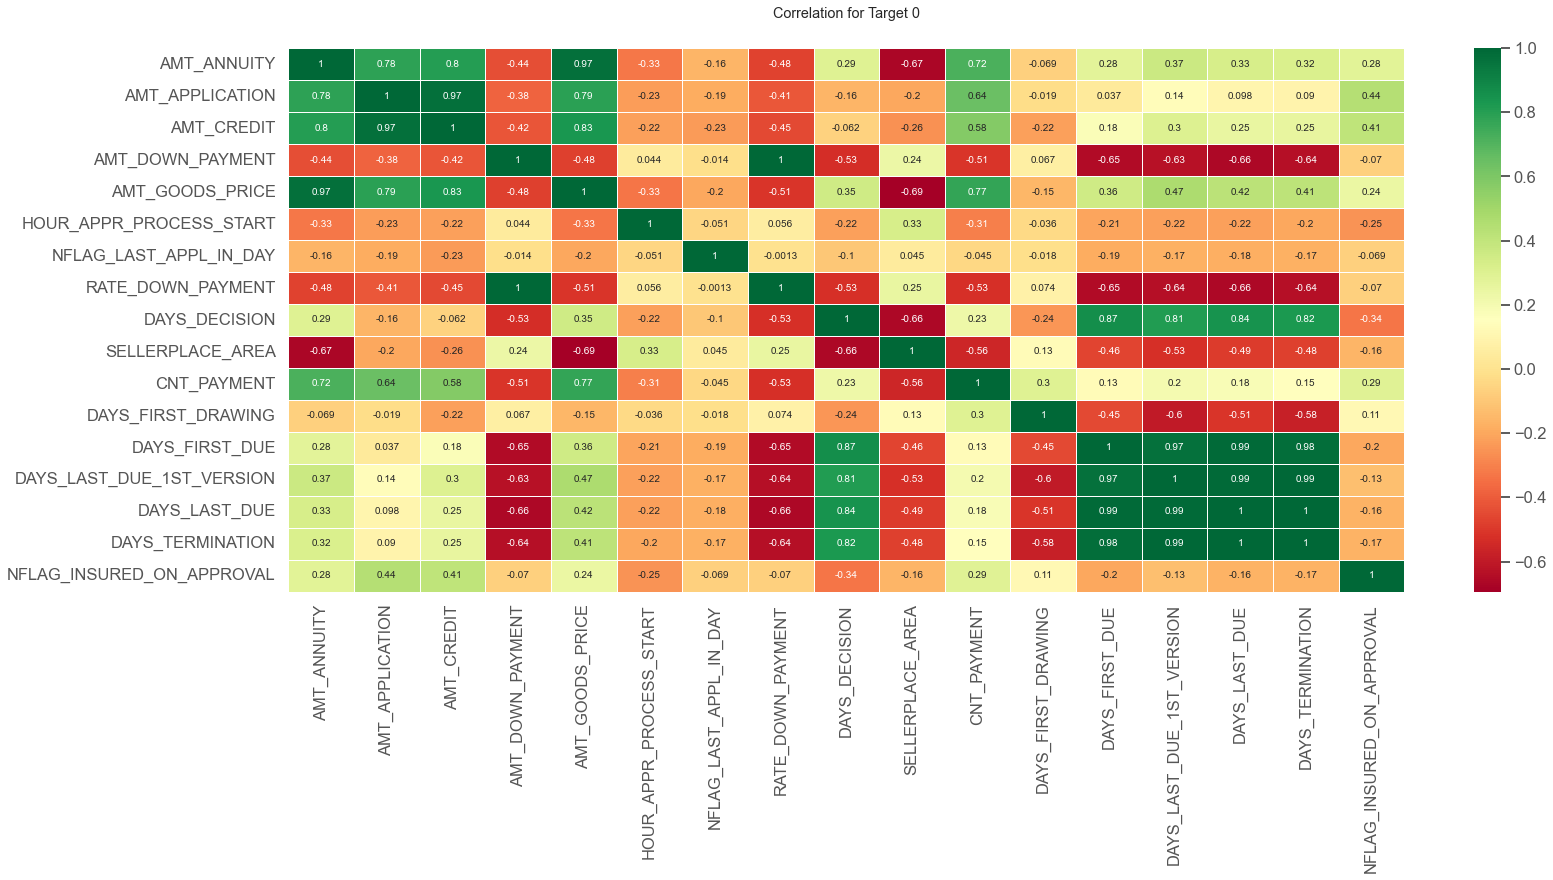

In [367]:
plt.figure(figsize=(25,10))
plt.title("Correlation for Target 0")
sns.heatmap(target0.corr(), annot=True, cmap="RdYlGn", linewidths=.5)
plt.show()

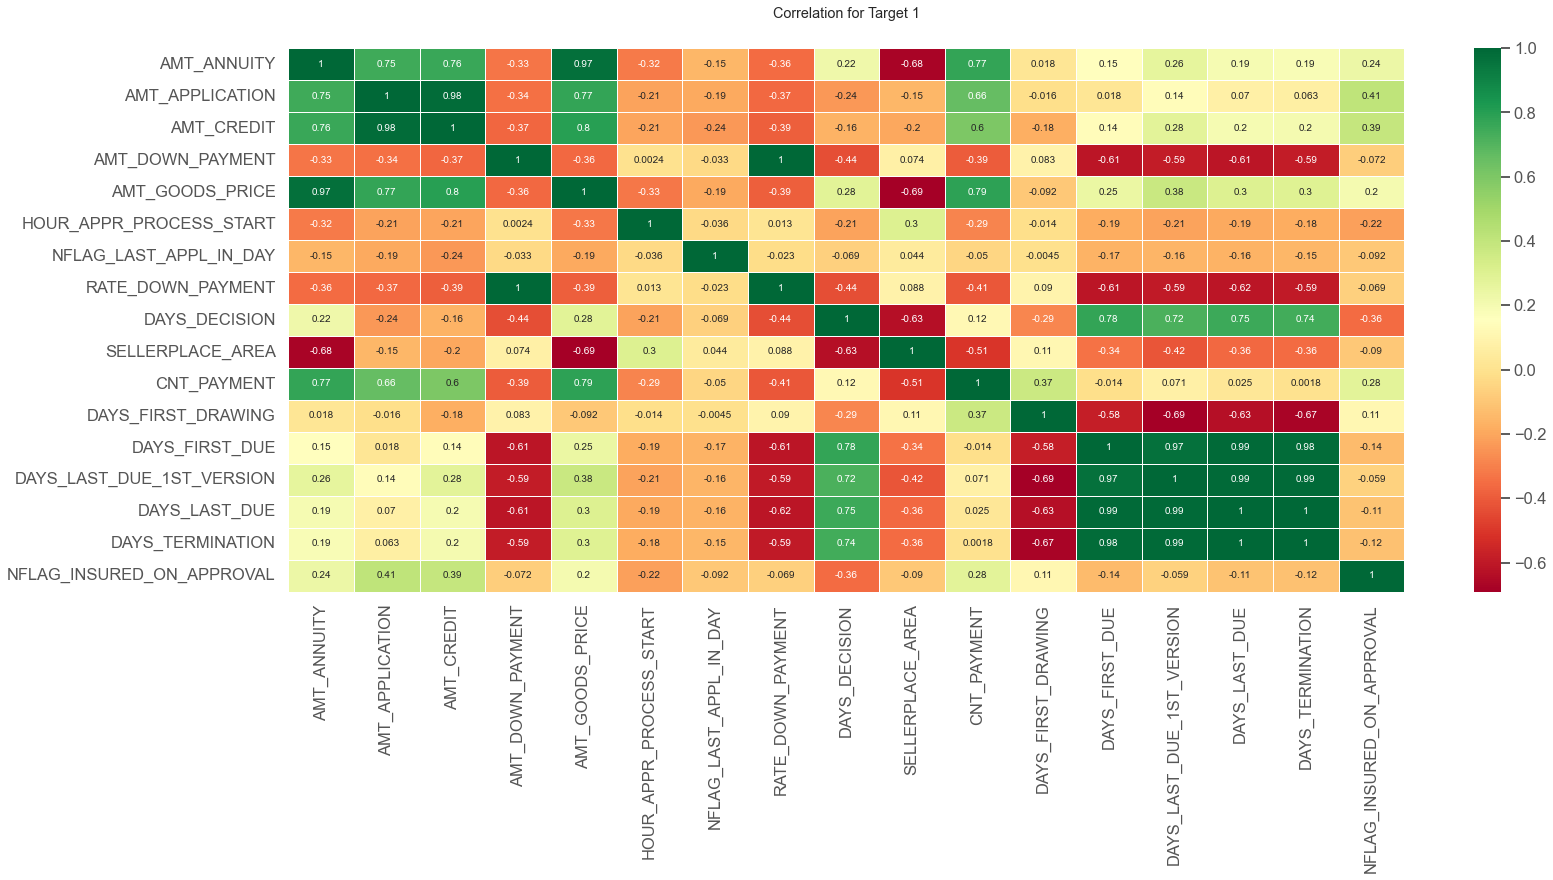

In [368]:
plt.figure(figsize=(25,10))
plt.title("Correlation for Target 1")
sns.heatmap(target1.corr(), annot=True, cmap="RdYlGn", linewidths=.5)
plt.show()

In [369]:
def univariate_numerical(data,col,title):
    
    sns.boxplot(data =target0, x=col,orient='v')

    plt.show()

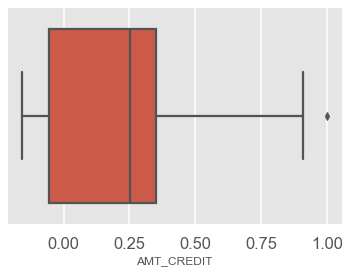

In [370]:
univariate_numerical(data=target0,col='AMT_CREDIT',title='Distribution of credit amount')
plt.show()

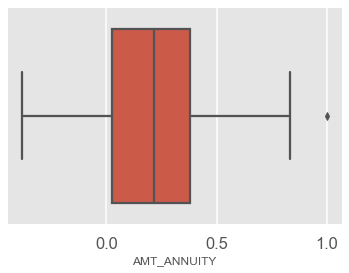

In [371]:
univariate_numerical(data=target0,col='AMT_ANNUITY',title='Distribution of Annuity amount')

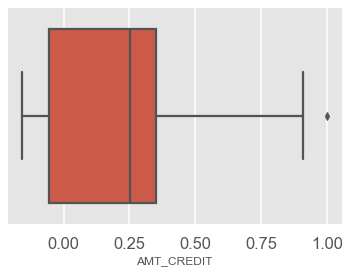

In [372]:
univariate_numerical(data=target1,col='AMT_CREDIT',title='Distribution of income amount')

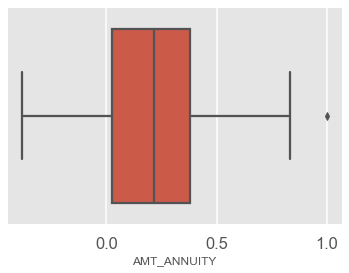

In [373]:
univariate_numerical(data=target0,col='AMT_ANNUITY',title='Distribution of Annuity amount')


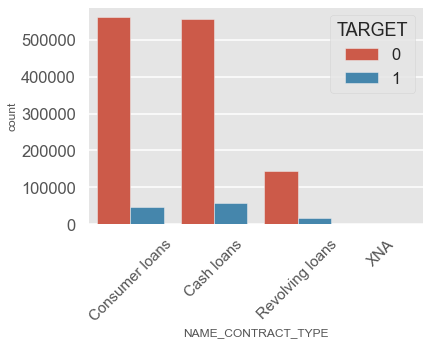

In [374]:
plt.xticks(rotation=45, fontsize=15)
sns.countplot(NewDataMerge.NAME_CONTRACT_TYPE, hue=NewDataMerge.TARGET)
plt.show()


In [375]:
def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [376]:
value_wise_defaulter_percentage(NewDataMerge, 'NAME_GOODS_CATEGORY')


,Value,Percentage of Defaulter
23,Insurance,10.526316
0,Vehicles,10.470348
4,XNA,9.457805
14,Jewelry,9.136048
17,Auto Accessories,9.092412
3,Mobile,8.659871
15,Office Appliances,8.337570
21,Direct Sales,8.227848
9,Computers,8.191902
6,Audio/Video,7.738117


In [377]:
value_wise_defaulter_percentage(NewDataMerge, 'NAME_PORTFOLIO')


,Value,Percentage of Defaulter
3,Cards,10.166419
2,XNA,9.744705
1,Cash,9.002773
0,POS,7.698466
4,Cars,0.000000


In [378]:
value_wise_defaulter_percentage(NewDataMerge, 'NAME_PRODUCT_TYPE')


,Value,Percentage of Defaulter
2,walk-in,12.585126
0,XNA,8.409277
1,x-sell,8.186282


In [379]:
value_wise_defaulter_percentage(NewDataMerge, 'CHANNEL_TYPE')


,Value,Percentage of Defaulter
4,AP+ (Cash loan),12.906325
5,Contact center,10.365622
3,Credit and cash offices,9.083766
1,Country-wide,8.306007
2,Regional / Local,7.694708
0,Stone,7.428061
6,Channel of corporate sales,6.322506
7,Car dealer,0.000000


In [380]:
value_wise_defaulter_percentage(NewDataMerge, 'NAME_SELLER_INDUSTRY')


,Value,Percentage of Defaulter
0,Auto technology,10.494317
4,XNA,9.430932
3,Connectivity,9.225316
9,Jewelry,8.953771
2,Consumer electronics,7.607258
7,Industry,7.324035
5,Construction,6.608148
10,MLM partners,6.215316
1,Furniture,6.174295
6,Clothing,5.869506


In [381]:
value_wise_defaulter_percentage(NewDataMerge, 'NAME_YIELD_GROUP')


,Value,Percentage of Defaulter
2,XNA,9.864518
3,high,9.595490
1,middle,8.144425
0,low_normal,7.211920
4,low_action,6.496898
